# Домашнее задание № 1

### Автор: Кузнецов С.И.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Анализ исходных данных

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Класс

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

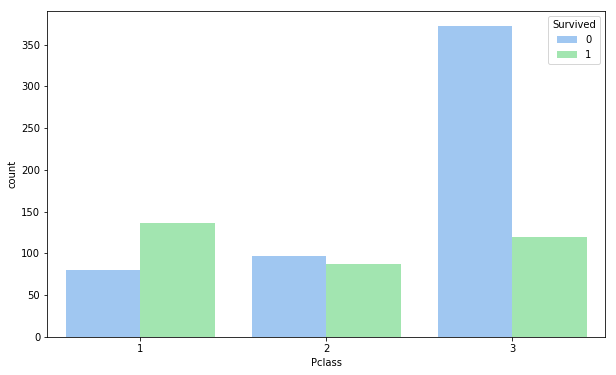

In [6]:
plt.figure(figsize=(10,6))
mpl.style.use('seaborn-pastel')
sns.countplot(x = train.Pclass, hue = train.Survived)
plt.show()

* Имя

Проверим наиболее часто встречающиеся имена.

In [7]:
from collections import Counter
import re

In [8]:
one_big_text = ' '.join(train.Name)
words = re.compile('[^a-zA-Z ]').sub('', one_big_text).split()
most_common = Counter(words).most_common()
most_common[:20]

[('Mr', 521),
 ('Miss', 182),
 ('Mrs', 129),
 ('William', 64),
 ('John', 44),
 ('Master', 40),
 ('Henry', 35),
 ('James', 24),
 ('George', 24),
 ('Charles', 23),
 ('Thomas', 22),
 ('Mary', 20),
 ('Edward', 18),
 ('Anna', 17),
 ('Joseph', 16),
 ('Elizabeth', 15),
 ('Johan', 15),
 ('Frederick', 15),
 ('Richard', 14),
 ('Samuel', 13)]

In [9]:
Xbreed = pd.DataFrame()
for col, num in most_common[:20]:
    Xbreed[col] = train.Name.str.contains(col).astype(int)
Xbreed.head()

,Mr,Miss,Mrs,William,John,Master,Henry,James,George,Charles,Thomas,Mary,Edward,Anna,Joseph,Elizabeth,Johan,Frederick,Richard,Samuel
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(Xbreed, train.Survived)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
import numpy as np

In [13]:
fast_names = [n[0] for n in most_common[:len(clf.feature_importances_)]]
fast_names

['Mr',
 'Miss',
 'Mrs',
 'William',
 'John',
 'Master',
 'Henry',
 'James',
 'George',
 'Charles',
 'Thomas',
 'Mary',
 'Edward',
 'Anna',
 'Joseph',
 'Elizabeth',
 'Johan',
 'Frederick',
 'Richard',
 'Samuel']

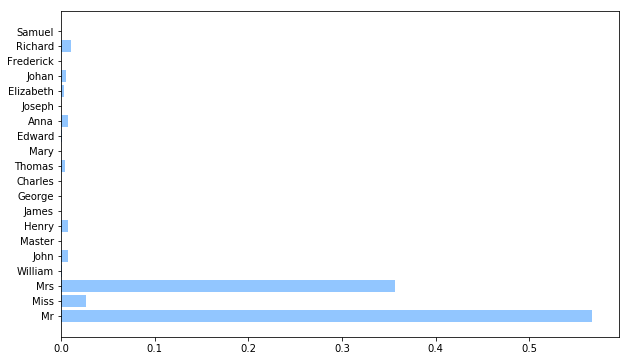

In [14]:
mpl.style.use('seaborn-pastel')
plt.figure(figsize=(10,6))
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(fast_names)), fast_names)
plt.show()

In [15]:
quality_features = {'Name': np.array(fast_names)[clf.feature_importances_ >= .02].tolist()}
quality_features

{'Name': ['Mr', 'Miss', 'Mrs']}

* Пол

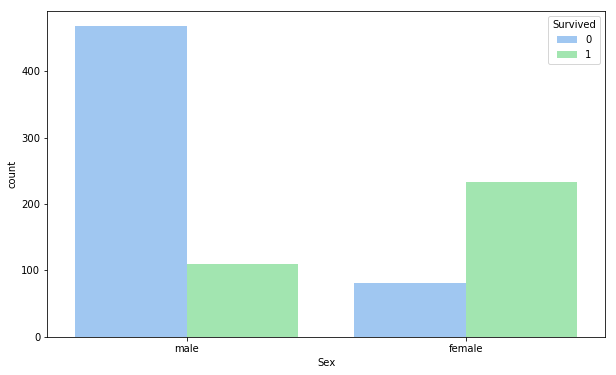

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = train.Sex, hue = train.Survived)
plt.show()

* Возраст

/home/sergmath/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sergmath/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


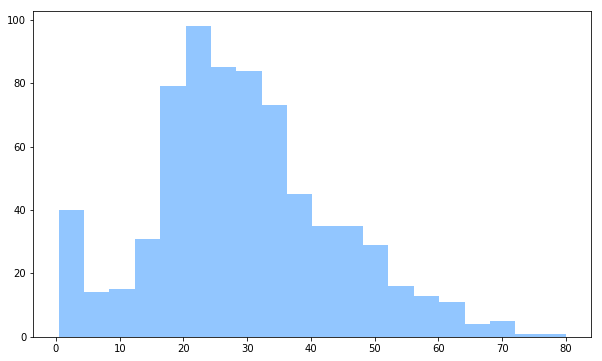

In [17]:
plt.figure(figsize=(10,6))
plt.hist(train.Age, bins = 20)
plt.show()

In [18]:
ages = pd.pivot_table(data = train, index = 'Pclass', columns = 'Sex', values = 'Age')
ages

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


* Цена билета

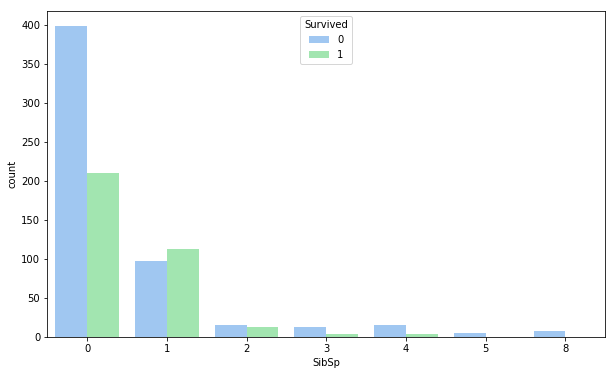

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x = train.SibSp, hue = train.Survived)
plt.show()

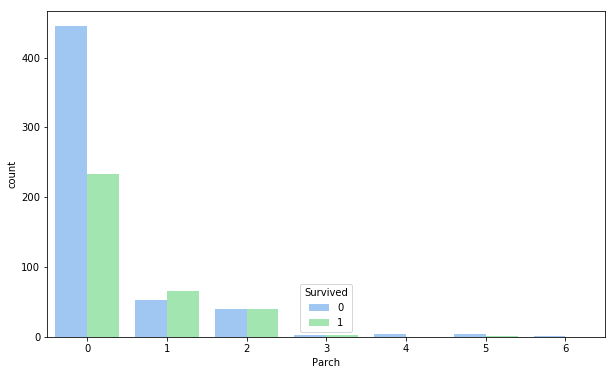

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x = train.Parch, hue = train.Survived)
plt.show()

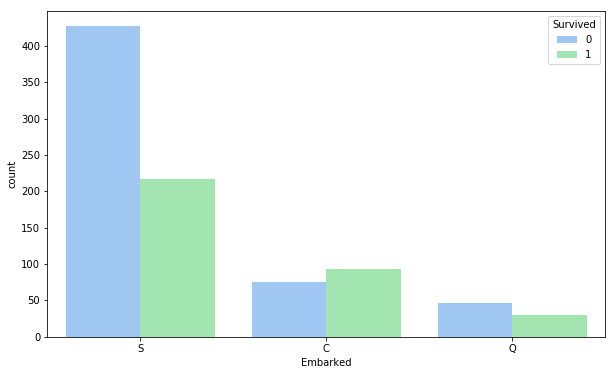

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x = train.Embarked, hue = train.Survived)
plt.show()

In [22]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
C22 C26        3
E101           3
F2             3
E25            2
E8             2
C124           2
B5             2
B49            2
B35            2
C92            2
F4             2
B22            2
C126           2
C68            2
E44            2
C65            2
E67            2
D20            2
E33            2
C93            2
E24            2
D36            2
B58 B60        2
D26            2
E121           2
              ..
A6             1
D50            1
C101           1
E36            1
A36            1
E77            1
D37            1
B69            1
B73            1
C103           1
A31            1
D11            1
C99            1
C49            1
E49            1
B38            1
E40            1
C104           1
E38            1
C128           1
A19            1
C54            1
C95            1
A7             1
C70            1
E34            1
D15            1
D21           

In [23]:
tickets = ' '.join(train.Ticket)
letters = re.compile('[^a-zA-Z ]').sub('', tickets).split()
most_common = Counter(letters).most_common()
most_common

[('PC', 60),
 ('CA', 41),
 ('A', 28),
 ('STONO', 18),
 ('SOTONOQ', 15),
 ('WC', 10),
 ('SCPARIS', 7),
 ('SOC', 6),
 ('C', 5),
 ('FCC', 5),
 ('SCParis', 4),
 ('LINE', 4),
 ('PP', 3),
 ('WEP', 3),
 ('SCAH', 3),
 ('SOPP', 3),
 ('SWPP', 2),
 ('PPP', 2),
 ('SOTONO', 2),
 ('SCA', 1),
 ('SP', 1),
 ('SOP', 1),
 ('Fa', 1),
 ('SCOW', 1),
 ('SC', 1),
 ('AS', 1),
 ('Basle', 1),
 ('FC', 1),
 ('CASOTON', 1)]

In [24]:
ticket_classes = [t[0] for t in most_common]
quality_features['Ticket'] = ticket_classes
quality_features

{'Name': ['Mr', 'Miss', 'Mrs'],
 'Ticket': ['PC',
  'CA',
  'A',
  'STONO',
  'SOTONOQ',
  'WC',
  'SCPARIS',
  'SOC',
  'C',
  'FCC',
  'SCParis',
  'LINE',
  'PP',
  'WEP',
  'SCAH',
  'SOPP',
  'SWPP',
  'PPP',
  'SOTONO',
  'SCA',
  'SP',
  'SOP',
  'Fa',
  'SCOW',
  'SC',
  'AS',
  'Basle',
  'FC',
  'CASOTON']}

In [25]:
cabins = ' '.join(train.Cabin.dropna())
letters = re.compile('[^a-zA-Z ]').sub('', cabins).split()
most_common = Counter(letters).most_common()
most_common

[('C', 71),
 ('B', 64),
 ('D', 34),
 ('E', 33),
 ('A', 15),
 ('F', 13),
 ('G', 7),
 ('T', 1)]

In [26]:
cabins_classes = [t[0] for t in most_common]
quality_features['Cabin'] = cabins_classes
quality_features

{'Name': ['Mr', 'Miss', 'Mrs'],
 'Ticket': ['PC',
  'CA',
  'A',
  'STONO',
  'SOTONOQ',
  'WC',
  'SCPARIS',
  'SOC',
  'C',
  'FCC',
  'SCParis',
  'LINE',
  'PP',
  'WEP',
  'SCAH',
  'SOPP',
  'SWPP',
  'PPP',
  'SOTONO',
  'SCA',
  'SP',
  'SOP',
  'Fa',
  'SCOW',
  'SC',
  'AS',
  'Basle',
  'FC',
  'CASOTON'],
 'Cabin': ['C', 'B', 'D', 'E', 'A', 'F', 'G', 'T']}

## Делаем фичи

In [27]:
def fill_age(s, ages_stat):
    '''
    Заполнение пропущенных значений возраста пассажира. 
    Если возраст пропущен, то заполняем его средним значением, соответствующим классу и полу.
    ages_stat - Статистика по возрастам.
    '''
    if pd.isna(s.Age):
        return ages_stat[s.Sex][s.Pclass]
    return s.Age

In [28]:
def data_preprocessing(df, ages_stat, q_features):
    '''
    Выполняет препроцессинг исходного датафрейма. 
    Возвращает датафрейм с готовыми фичами.
    '''
    Res = df  # Результат
    
    # Заполняем пропущенные значения возраста 
    Res['Age'] = df.apply(fill_age, axis = 1, ages_stat = ages_stat)
    
    # Преобразуем качественные фичи в количественные
    Res = pd.get_dummies(data = Res, 
                          columns = ['Pclass', 'Sex', 'Embarked'], 
                          dummy_na = True, 
                          drop_first = True)
    
    for f, v in q_features.items():
        for n in v:
            Res[f + '_' + n] = Res[f].str.contains(n).fillna(False).astype(int)
       
    # Удаляем лишние поля и возвращаем результат
    return Res.drop(['Name', 'Ticket', 'Cabin', 'Pclass_nan', 'Sex_nan'], axis=1)

In [29]:
df_train = data_preprocessing(df = train,
                              ages_stat = ages,
                              q_features = quality_features)

df_test = data_preprocessing(df = test,
                             ages_stat = ages,
                             q_features = quality_features)

In [30]:
test[pd.isna(test.Fare)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [31]:
df_test.Fare[pd.isna(test.Fare)] = train[train.Pclass == 3].Fare.mean()

/home/sergmath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
Xtrain = df_train.drop(['PassengerId', 'Survived'], axis = 1)
Xtest = df_test.drop(['PassengerId'], axis = 1)

y = df_train.Survived

Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 50 columns):
Age               418 non-null float64
SibSp             418 non-null int64
Parch             418 non-null int64
Fare              418 non-null float64
Pclass_2.0        418 non-null uint8
Pclass_3.0        418 non-null uint8
Sex_male          418 non-null uint8
Embarked_Q        418 non-null uint8
Embarked_S        418 non-null uint8
Embarked_nan      418 non-null uint8
Name_Mr           418 non-null int64
Name_Miss         418 non-null int64
Name_Mrs          418 non-null int64
Ticket_PC         418 non-null int64
Ticket_CA         418 non-null int64
Ticket_A          418 non-null int64
Ticket_STONO      418 non-null int64
Ticket_SOTONOQ    418 non-null int64
Ticket_WC         418 non-null int64
Ticket_SCPARIS    418 non-null int64
Ticket_SOC        418 non-null int64
Ticket_C          418 non-null int64
Ticket_FCC        418 non-null int64
Ticket_SCParis    418 non-null int64
Tic

## Обучаем модель

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
depths = np.arange(1,10)
min_samples_split = np.arange(5, 200, 5)
grid = {'max_depth': depths, 'min_samples_split': min_samples_split}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [35]:
%%time
gridsearch.fit(Xtrain, y)

CPU times: user 38.1 s, sys: 140 ms, total: 38.2 s
Wall time: 38.8 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

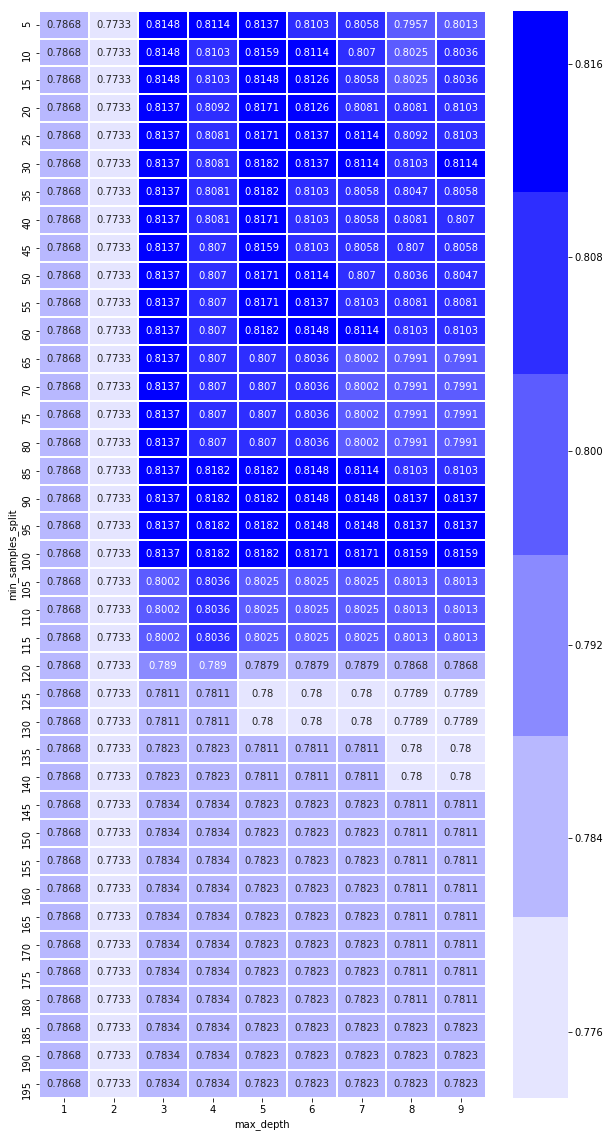

In [36]:
cross_validation = pd.DataFrame(data = 
                                {'max_depth': gridsearch.cv_results_['param_max_depth'].data,
                                 'min_samples_split': gridsearch.cv_results_['param_min_samples_split'].data,
                                 'scores': gridsearch.cv_results_['mean_test_score']}
                               )
plt.figure(figsize=(10,20))

sns.heatmap(pd.pivot_table(data = cross_validation, 
                           index = 'min_samples_split', 
                           columns = 'max_depth', 
                           values = 'scores'), 
            annot = True, 
            fmt = ".4", 
            linewidths = 1, 
            cmap = sns.light_palette("blue"))


In [37]:
cross_validation.sort_values('scores', ascending = False).head(10)

,max_depth,min_samples_split,scores
175,5,100,0.818182
172,5,85,0.818182
167,5,60,0.818182
133,4,85,0.818182
134,4,90,0.818182
135,4,95,0.818182
136,4,100,0.818182
162,5,35,0.818182
161,5,30,0.818182
174,5,95,0.818182


Выбираем параметры 

*max_depth = 5*

*min_samples_split = 100*

И обучаем дерево.

In [38]:
clf_final = DecisionTreeClassifier(max_depth=5, min_samples_split= 100)

In [39]:
clf_final.fit(Xtrain, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

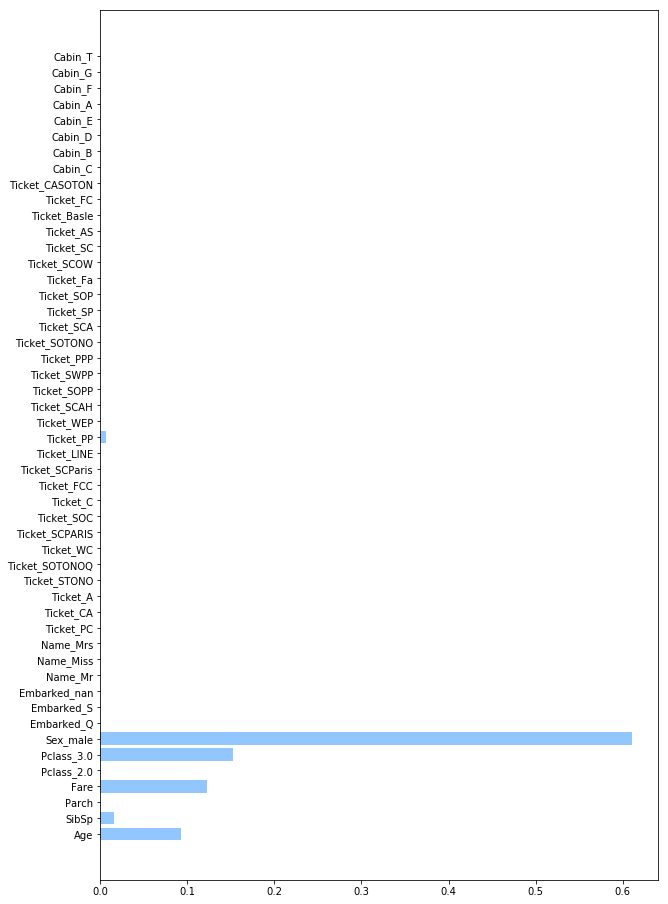

In [40]:
mpl.style.use('seaborn-pastel')
plt.figure(figsize=(10,16))
plt.barh(np.arange(len(clf_final.feature_importances_)), clf_final.feature_importances_)
plt.yticks(np.arange(len(Xtrain.columns)),Xtrain.columns)
plt.show()

In [41]:
y_pred=clf_final.predict(Xtest)

In [42]:
submit = pd.DataFrame(data = {'PassengerId': df_test.PassengerId, 'Survived': y_pred})
submit.to_csv('solve.csv', index = False)
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [43]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [44]:
get_tree_dot_view(clf_final, list(Xtrain.columns))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Sex_male <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Pclass_3.0 <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="Fare <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]", fillcolor="#399de5f2"] ;
2 -> 4 ;
5 [label="gini = 0.182\nsamples = 69\nvalue = [7, 62]", fillcolor="#399de5e2"] ;
4 -> 5 ;
6 [label="gini = 0.02\nsamples = 99\nvalue = [1, 98]", fillcolor="#399de5fc"] ;
4 -> 6 ;
7 [label="Fare <= 23.35\ngini = 0.5\nsamples = 144\nvalue = [72, 72]", fillcolor="#e5813900"] ;
1 -> 7 ;
8 [label="Age <= 27.5\ngini = 0.484\nsamples = 117\nvalue = [48, 69]", fillcolor="#399de